Creating a simple linear regression model using pytorch

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

Preparing and loading the data

In [2]:
# create known params

weight = 0.7
bias = 0.3


# creating a range of nums

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step)
y = weight * X + bias

print(f"The first ten values of X are {X[:10]}")
print(f"The first ten values of y are {y[:10]}")
print(f"The length of X is {len(X)}")
print(f"The length of y is {len(y)}")

The first ten values of X are tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800])
The first ten values of y are tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260])
The length of X is 50
The length of y is 50


Splitting the data into a training set and a testing set
A validation set is not necessary in this case hence it will not be created
Training set (80 % )
Testing set (20 % )

In [3]:
train_split = int(0.8 * len(X))
print(f"The total training samples are {train_split}")

The total training samples are 40


In [4]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

Visualising our data

In [5]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    """
    Plots the training and the testing data and compares predicitons
    """
    plt.figure(figsize=(10, 7))

    # training data is to be plotted in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Testing data is to be plotted in red
    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

    # Checking if there are any predictions to plot them if they do exist
    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", label="Predictions")

    plt.legend(prop={"size": 14})

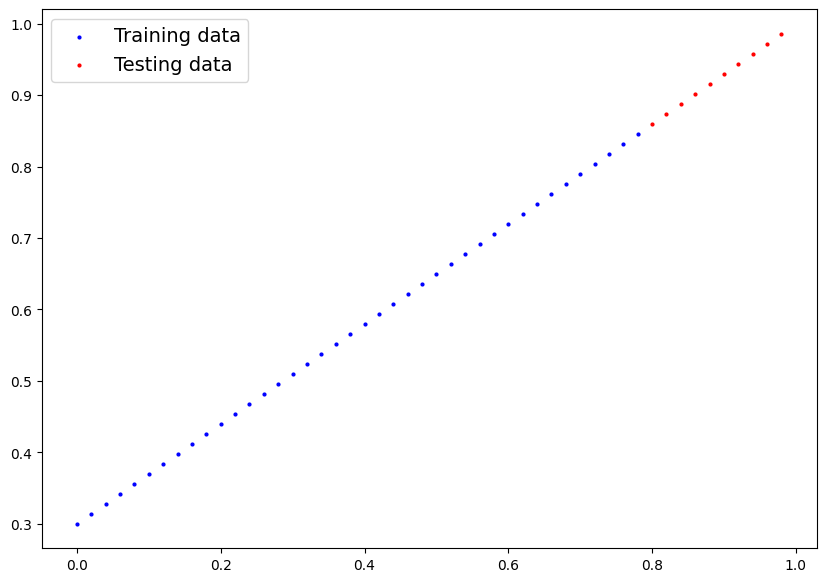

In [6]:
plot_predictions()

We can clearly see a perfect regression line, this functio is only plotting the sets and not the predictions is because we have  not made any. We will now focus on actually creating the model

In [7]:
class LinearRegression(nn.Module):

    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(torch.randn(
            1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(
            1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        This function is responsible for the computation of the data in the model and how it will proceed
        """
        return self.weights * x + self.bias

The above class uses two main models -> Gradient descent and backpropogation
Checking the params of our subclass

In [8]:
# Creating a random seed

torch.manual_seed(42)

model = LinearRegression()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
# Making Predictions to see how it predicts y_test

with torch.inference_mode():
    y_predictions = model(X_test)

print(y_predictions)
print(y_test)

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])
tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
        0.9860])


These values are completely different, the model did not predict the correct value. Plotting these values to compare

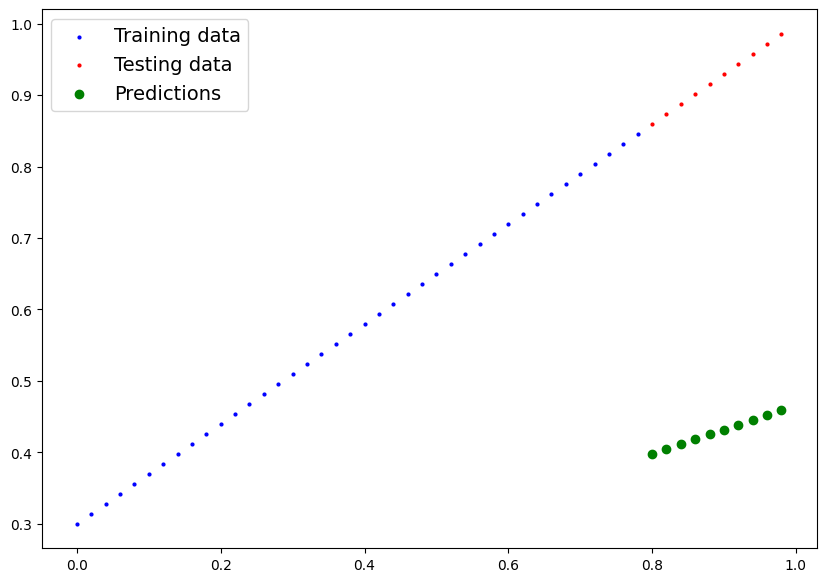

In [11]:
plot_predictions(predictions=y_predictions)

Training the model

In [12]:
torch.manual_seed(42)

# Setting up loss function
loss_function = nn.L1Loss()

# Setting up an optimiser

optimiser = torch.optim.SGD(params=model.parameters(), lr=0.001)

# Creating the training loop

epochs = 10000

epoch_count = []
loss_vals = []
test_loss_vals = []


for epoch in range(epochs):
    model.train()

    # pass to forwrad function
    y_predictions = model(X_train)

    # calculate loss function
    loss = loss_function(y_predictions, y_train)
    # optimising based on loss function
    optimiser.zero_grad()

    # perform backpropogation on the loss wrt the params
    loss.backward()

    # step the optimiser
    optimiser.step()

    # testing the model
    model.eval()
    with torch.inference_mode():
        test_predictions = model(X_test)

        # calculate loss function

        test_loss = loss_function(test_predictions, y_test)
        epoch_count.append(epoch)
        loss_vals.append(loss)
        test_loss_vals.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

        print(model.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4931890368461609
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
Epoch: 1 | Loss: 0.3117292523384094 | Test Loss: 0.4918419420719147
OrderedDict([('weights', tensor([0.3375])), ('bias', tensor([0.1308]))])
Epoch: 2 | Loss: 0.3105771541595459 | Test Loss: 0.49049490690231323
OrderedDict([('weights', tensor([0.3379])), ('bias', tensor([0.1318]))])
Epoch: 3 | Loss: 0.3094250559806824 | Test Loss: 0.48914775252342224
OrderedDict([('weights', tensor([0.3383])), ('bias', tensor([0.1328]))])
Epoch: 4 | Loss: 0.30827295780181885 | Test Loss: 0.4878006875514984
OrderedDict([('weights', tensor([0.3386])), ('bias', tensor([0.1338]))])
Epoch: 5 | Loss: 0.3071208596229553 | Test Loss: 0.4864535331726074
OrderedDict([('weights', tensor([0.3390])), ('bias', tensor([0.1348]))])
Epoch: 6 | Loss: 0.3059687614440918 | Test Loss: 0.4851064682006836
OrderedDict([('weights', tensor([0.3394])), ('bias', tensor([0.1358]))])
Epoch: 7 

Epoch: 384 | Loss: 0.04629909247159958 | Test Loss: 0.12049472332000732
OrderedDict([('weights', tensor([0.4695])), ('bias', tensor([0.3847]))])
Epoch: 385 | Loss: 0.04624864086508751 | Test Loss: 0.12024979293346405
OrderedDict([('weights', tensor([0.4697])), ('bias', tensor([0.3847]))])
Epoch: 386 | Loss: 0.046198178082704544 | Test Loss: 0.12000487744808197
OrderedDict([('weights', tensor([0.4699])), ('bias', tensor([0.3848]))])
Epoch: 387 | Loss: 0.046147722750902176 | Test Loss: 0.11975999176502228
OrderedDict([('weights', tensor([0.4701])), ('bias', tensor([0.3848]))])
Epoch: 388 | Loss: 0.04609726741909981 | Test Loss: 0.1195150837302208
OrderedDict([('weights', tensor([0.4704])), ('bias', tensor([0.3849]))])
Epoch: 389 | Loss: 0.04604680463671684 | Test Loss: 0.11927016079425812
OrderedDict([('weights', tensor([0.4706])), ('bias', tensor([0.3849]))])
Epoch: 390 | Loss: 0.045996345579624176 | Test Loss: 0.11902527511119843
OrderedDict([('weights', tensor([0.4708])), ('bias', ten

Epoch: 790 | Loss: 0.031572166830301285 | Test Loss: 0.07373266667127609
OrderedDict([('weights', tensor([0.5431])), ('bias', tensor([0.3659]))])
Epoch: 791 | Loss: 0.03153776004910469 | Test Loss: 0.07369112968444824
OrderedDict([('weights', tensor([0.5433])), ('bias', tensor([0.3658]))])
Epoch: 792 | Loss: 0.03150363638997078 | Test Loss: 0.07358090579509735
OrderedDict([('weights', tensor([0.5434])), ('bias', tensor([0.3658]))])
Epoch: 793 | Loss: 0.03146884962916374 | Test Loss: 0.0735393688082695
OrderedDict([('weights', tensor([0.5436])), ('bias', tensor([0.3657]))])
Epoch: 794 | Loss: 0.03143510967493057 | Test Loss: 0.0734291821718216
OrderedDict([('weights', tensor([0.5438])), ('bias', tensor([0.3656]))])
Epoch: 795 | Loss: 0.03140020743012428 | Test Loss: 0.0733189806342125
OrderedDict([('weights', tensor([0.5440])), ('bias', tensor([0.3656]))])
Epoch: 796 | Loss: 0.03136632218956947 | Test Loss: 0.07327743619680405
OrderedDict([('weights', tensor([0.5441])), ('bias', tensor(

Epoch: 1249 | Loss: 0.015807893127202988 | Test Loss: 0.036882489919662476
OrderedDict([('weights', tensor([0.6215])), ('bias', tensor([0.3330]))])
Epoch: 1250 | Loss: 0.015772998332977295 | Test Loss: 0.036772288382053375
OrderedDict([('weights', tensor([0.6217])), ('bias', tensor([0.3329]))])
Epoch: 1251 | Loss: 0.015739355236291885 | Test Loss: 0.03673075884580612
OrderedDict([('weights', tensor([0.6219])), ('bias', tensor([0.3328]))])
Epoch: 1252 | Loss: 0.01570446975529194 | Test Loss: 0.03662055730819702
OrderedDict([('weights', tensor([0.6220])), ('bias', tensor([0.3328]))])
Epoch: 1253 | Loss: 0.015670450404286385 | Test Loss: 0.03657899424433708
OrderedDict([('weights', tensor([0.6222])), ('bias', tensor([0.3327]))])
Epoch: 1254 | Loss: 0.015635941177606583 | Test Loss: 0.03646882623434067
OrderedDict([('weights', tensor([0.6224])), ('bias', tensor([0.3326]))])
Epoch: 1255 | Loss: 0.015601545572280884 | Test Loss: 0.03642727807164192
OrderedDict([('weights', tensor([0.6225])),

Epoch: 1574 | Loss: 0.004645687993615866 | Test Loss: 0.010782653465867043
OrderedDict([('weights', tensor([0.6771])), ('bias', tensor([0.3096]))])
Epoch: 1575 | Loss: 0.004610785748809576 | Test Loss: 0.01067246776074171
OrderedDict([('weights', tensor([0.6772])), ('bias', tensor([0.3096]))])
Epoch: 1576 | Loss: 0.004577117506414652 | Test Loss: 0.010630893521010876
OrderedDict([('weights', tensor([0.6774])), ('bias', tensor([0.3095]))])
Epoch: 1577 | Loss: 0.004542266018688679 | Test Loss: 0.010520708747208118
OrderedDict([('weights', tensor([0.6776])), ('bias', tensor([0.3094]))])
Epoch: 1578 | Loss: 0.00450820242986083 | Test Loss: 0.010479157790541649
OrderedDict([('weights', tensor([0.6777])), ('bias', tensor([0.3093]))])
Epoch: 1579 | Loss: 0.00447374302893877 | Test Loss: 0.010368973016738892
OrderedDict([('weights', tensor([0.6779])), ('bias', tensor([0.3093]))])
Epoch: 1580 | Loss: 0.004439301788806915 | Test Loss: 0.010327416472136974
OrderedDict([('weights', tensor([0.6781]

Epoch: 2004 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 2005 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 2006 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 2007 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 2008 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 2009 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 2010 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights'

OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 2379 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 2380 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 2381 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 2382 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 2383 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 2384 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 2385 | Loss: 0.00070

Epoch: 2841 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 2842 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 2843 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 2844 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 2845 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 2846 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 2847 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights'

OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 3239 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 3240 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 3241 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 3242 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 3243 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 3244 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 3245 | Loss: 0.00070

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 3668 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 3669 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 3670 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 3671 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 3672 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 3673 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 3674 | Loss: 0.00044

OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 4111 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 4112 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 4113 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 4114 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 4115 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 4116 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 4117 | Loss: 0.00070

OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 4493 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 4494 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 4495 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 4496 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 4497 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 4498 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 4499 | Loss: 0.00070

Epoch: 4876 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 4877 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 4878 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 4879 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 4880 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 4881 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 4882 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights'

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 5266 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 5267 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 5268 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 5269 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 5270 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 5271 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 5272 | Loss: 0.00044

Epoch: 5660 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 5661 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 5662 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 5663 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 5664 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 5665 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 5666 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights'

OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 6051 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 6052 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 6053 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 6054 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 6055 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 6056 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 6057 | Loss: 0.00070

Epoch: 6507 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 6508 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 6509 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 6510 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 6511 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 6512 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 6513 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights'

Epoch: 6883 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 6884 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 6885 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 6886 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 6887 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 6888 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 6889 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights'

Epoch: 7321 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 7322 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 7323 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 7324 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 7325 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 7326 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 7327 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights'

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 7788 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 7789 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 7790 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 7791 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 7792 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 7793 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 7794 | Loss: 0.00044

OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 8183 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 8184 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 8185 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 8186 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 8187 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 8188 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 8189 | Loss: 0.00070

OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 8615 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 8616 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 8617 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 8618 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 8619 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 8620 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 8621 | Loss: 0.00070

Epoch: 9068 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 9069 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 9070 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 9071 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 9072 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 9073 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 9074 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights'

OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 9529 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 9530 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 9531 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 9532 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 9533 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 9534 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 9535 | Loss: 0.00070

Epoch: 9959 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 9960 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 9961 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 9962 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 9963 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
Epoch: 9964 | Loss: 0.0004444979131221771 | Test Loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 9965 | Loss: 0.0007075972971506417 | Test Loss: 0.0007690846687182784
OrderedDict([('weights'

In [13]:
with torch.inference_mode():
    final_predictions = model(X_test)

print(final_predictions)

tensor([0.8593, 0.8733, 0.8873, 0.9013, 0.9152, 0.9292, 0.9432, 0.9572, 0.9712,
        0.9852])


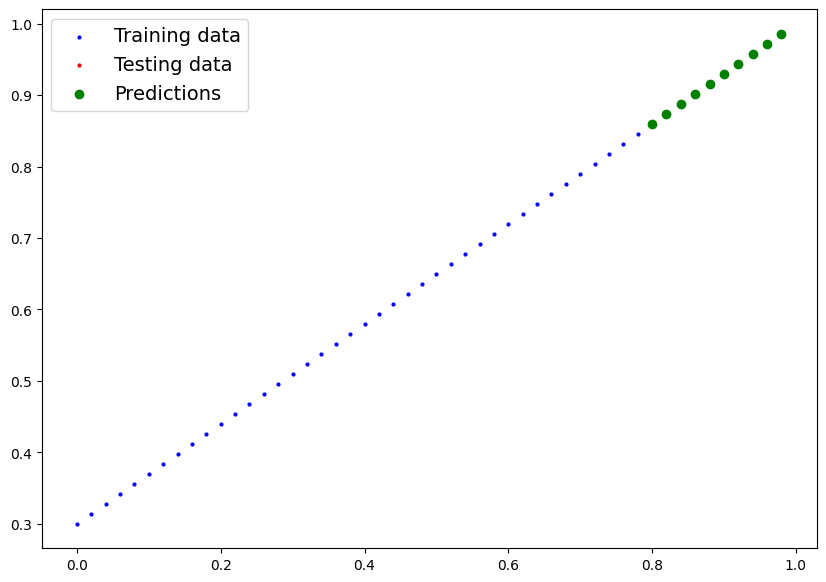

In [14]:
plot_predictions(predictions=final_predictions)

The predicted are values are extremly accurate as seen from the given graph

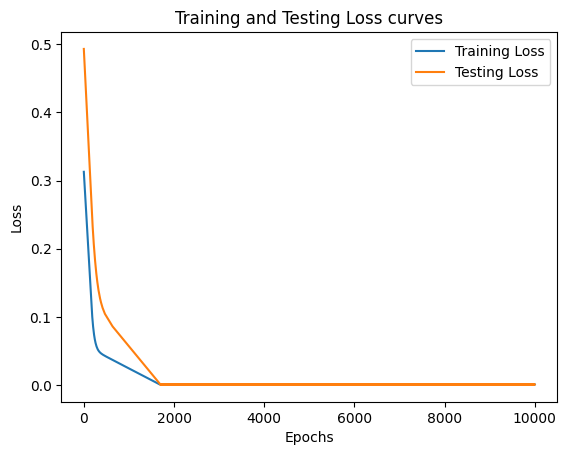

In [16]:
# Plotting the loss curve

plt.plot(epoch_count, np.array(torch.tensor(
    (loss_vals)).numpy()), label="Training Loss")
plt.plot(epoch_count, test_loss_vals, label="Testing Loss")
plt.title("Training and Testing Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [20]:
# Saving the model
filepath = "model.pth"
torch.save(model, filepath)